In [1]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
import pickle
import pandas as pd
import time
from nltk import ngrams
import nltk
import unicodedata
import string
import pickle
from tkinter import *

The following import is just a library that helps drawing shapes, I used it to draw the architecture of the neural network I used.

In [2]:
import sys
sys.path.append('C:\\users\\ysfds\\appdata\\local\\programs\\python\\python37-32\\lib\site-packages')    
from viznet import NodeBrush, EdgeBrush, DynamicShow

In [2]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\DataFrames\\fr_df"
with open (file_name,'rb') as pickle_out32:
    fr_dataFrame=pickle.load(pickle_out32)
del(pickle_out32)

In [7]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\DataFrames\\sp_df"
with open (file_name,'rb') as pickle_out32:
    sp_dataFrame=pickle.load(pickle_out32)
del(pickle_out32)

In [8]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\DataFrames\\it_df"
with open (file_name,'rb') as pickle_out32:
    it_dataFrame=pickle.load(pickle_out32)
del(pickle_out32)

In [9]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\DataFrames\\pt_df"
with open (file_name,'rb') as pickle_out32:
    pt_dataFrame=pickle.load(pickle_out32)
del(pickle_out32)

In the cells above we have loaded dataframes. Now let's add the response to each of the dataframes. Let's define a function that does that to make our code more fancy and re-utilisable! 

In [10]:
def get_response(dataframe,length,lang):
    response={'class':[lang for j in range (0,length)]}
    temp_dataFrame=pd.DataFrame.from_dict(response)
    L=dataframe.join(temp_dataFrame)
    return(L)

In [11]:
input_fr=get_response(fr_dataFrame,len(fr_dataFrame),'french')

C:\Users\YsfDS\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [12]:
input_sp=get_response(sp_dataFrame,len(sp_dataFrame),'spanish')

C:\Users\YsfDS\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [13]:
input_it=get_response(it_dataFrame,len(it_dataFrame),'italian')

C:\Users\YsfDS\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [14]:
input_pt=get_response(pt_dataFrame,len(pt_dataFrame),'portuguese')

C:\Users\YsfDS\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:558: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


Let's now concatenate these input tables into one big dataframe. Which is the ultimate representation of our dataset in function of the problem's features.

In [15]:
final_input=pd.concat([input_fr,input_sp,input_it,input_pt])
final_input

,"( , , s)","( , a, g)","( , a, i)","( , a, m)","( , a, p)","( , a, s)","( , a, u)","( , a, v)","( , b, i)","( , c, e)",...,"(v, i, c)","(v, o, i)","(v, o, n)","(v, o, r)","(v, o, u)","(y, s, )","(z, a, )","(z, i, o)","(z, z, a)",class
0,0.000555,0.000174,0.000445,0.000361,0.000555,0.000258,0.002536,0.001065,0.000394,0.004161,...,0.000110,0.000548,0.000413,0.000065,0.001245,0.000329,0.000000,0.000000,0.000000,french
1,0.000466,0.000119,0.000694,0.000203,0.000576,0.000278,0.002923,0.001081,0.000374,0.004044,...,0.000166,0.000586,0.000583,0.000063,0.000699,0.000188,0.000008,0.000008,0.000000,french
2,0.000459,0.000155,0.000367,0.000227,0.000405,0.000279,0.002875,0.001370,0.000425,0.004164,...,0.000074,0.000639,0.000585,0.000054,0.000961,0.000317,0.000011,0.000007,0.000000,french
3,0.000509,0.000236,0.000584,0.000322,0.000618,0.000285,0.003268,0.001219,0.000308,0.003346,...,0.000092,0.000667,0.000451,0.000034,0.000497,0.000425,0.000000,0.000000,0.000000,french
4,0.000583,0.000051,0.000406,0.000203,0.000291,0.000330,0.002801,0.001077,0.000330,0.003941,...,0.000139,0.000596,0.000406,0.000076,0.000520,0.000266,0.000000,0.000000,0.000000,french
5,0.000404,0.000083,0.000312,0.000309,0.000574,0.000219,0.003119,0.001346,0.000411,0.004588,...,0.000241,0.000790,0.000710,0.000046,0.000892,0.000306,0.000000,0.000000,0.000000,french
6,0.000546,0.000077,0.000340,0.000604,0.000430,0.000250,0.003294,0.000950,0.000257,0.004161,...,0.000116,0.001188,0.000668,0.000083,0.000443,0.000289,0.000000,0.000000,0.000000,french
7,0.000459,0.000290,0.000492,0.000230,0.000547,0.000334,0.002751,0.001132,0.000399,0.003725,...,0.000088,0.000717,0.000388,0.000131,0.000706,0.000208,0.000000,0.000000,0.000000,french
8,0.000496,0.000229,0.000386,0.000371,0.000502,0.000292,0.002774,0.001232,0.000363,0.004026,...,0.000082,0.000564,0.000714,0.000060,0.001088,0.000296,0.000002,0.000002,0.000000,french
9,0.000420,0.000220,0.000474,0.000217,0.000505,0.000330,0.003088,0.001294,0.000449,0.004168,...,0.000120,0.000701,0.000510,0.000049,0.000621,0.000694,0.000000,0.000000,0.000000,french


In [22]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\Final_Input"
with open (file_name,'wb') as pickle_out321:
    pickle.dump(final_input,pickle_out321)
del(pickle_out321)

In [3]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\Final_Input"
with open (file_name,'rb') as pickle_out321:
    final_input=pickle.load(pickle_out321)
del(pickle_out321)

Let's shuffle the rows because we are doing cross-validation later and it would be absurd to leave them the way they are now.

We will perform 10-folds cross-validation. We split the dataset into 10 equal groups, then we take the first and use it for validation and train the model using the other 9, and we do this 10 times. We gather then 10 test error from each fitting procedure by averaging them we get the CV test error estimate. So without further a do let's get to it!

In [16]:
final_input=shuffle(final_input) #The shuffling of the rows of the dataframe!

In [17]:
final_input

,"( , , s)","( , a, g)","( , a, i)","( , a, m)","( , a, p)","( , a, s)","( , a, u)","( , a, v)","( , b, i)","( , c, e)",...,"(v, i, c)","(v, o, i)","(v, o, n)","(v, o, r)","(v, o, u)","(y, s, )","(z, a, )","(z, i, o)","(z, z, a)",class
2969,0.000420,0.000220,0.000474,0.000217,0.000505,0.000330,0.003088,0.001294,0.000449,0.004168,...,0.000120,0.000701,0.000510,0.000049,0.000621,0.000694,0.000000,0.000000,0.000000,french
4619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009346,0.000000,italian
4892,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012987,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,spanish
2655,0.000404,0.000083,0.000312,0.000309,0.000574,0.000219,0.003119,0.001346,0.000411,0.004588,...,0.000241,0.000790,0.000710,0.000046,0.000892,0.000306,0.000000,0.000000,0.000000,french
8521,0.000000,0.001238,0.000000,0.000371,0.000603,0.001253,0.000387,0.000124,0.000217,0.000232,...,0.000155,0.000000,0.000000,0.000031,0.000000,0.000000,0.000170,0.000031,0.000000,spanish
4180,0.000000,0.000730,0.000228,0.000342,0.001164,0.002055,0.000183,0.000183,0.000000,0.000571,...,0.000046,0.000000,0.000137,0.000046,0.000068,0.000000,0.000228,0.000023,0.000000,portuguese
1653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025316,0.012658,italian
3439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034091,0.000000,italian
7186,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,portuguese
1869,0.000420,0.000220,0.000474,0.000217,0.000505,0.000330,0.003088,0.001294,0.000449,0.004168,...,0.000120,0.000701,0.000510,0.000049,0.000621,0.000694,0.000000,0.000000,0.000000,french


Let's proceed with the cross-validation.

ten_folding simply creates ten groups of input data and corresponding outputs.
More simply put: we extract the top 1/10 of the dataframe line by line and save the features in a list and the output in an other list. So with the notation used in the function: len(i_fold) would be length/10 andd len(i_fold) would be 464. And len(i_output) would be length/10, but type(i_output[i]) (with i an integer) would be a string representing the language corresponding to the feature vector i_fold[i]. And finally, len(ten_folds)=len(ten_outputs)=10.

Hope that's clear enough!

In [52]:
def ten_folding(dataframe):
    work=dataframe.values.tolist()
    length=len(work)
    ten_folds=[]
    ten_outputs=[]
    for i in range(0,10):
        i_fold=[]
        i_output=[]
        for j in range (int(i*(length/10)),int((i+1)*(length/10))):
            i_fold.append(work[j][0:464])
            i_output.append(work[j][464])
        ten_folds.append(i_fold)
        ten_outputs.append(i_output)
    return(ten_folds,ten_outputs)

In [53]:
st=time.time()
ten_folds,ten_outputs=ten_folding(final_input)
end=time.time()
print(end-st)

4.405932664871216


The following function prepares for the 10-fold cross validation, we give an input number n for which we get the cross-validation dataset that will be used for training X and the corrsponding output y. 

In [54]:
def get_fitting_folds(n,tenfolds,tenoutputs):
    if n>0 and n<11:
        X=[]
        y=[]
        for i in range (0,n-1):
            X=X+tenfolds[i]
            y=y+tenoutputs[i]
        for i in range (n,10):
            X=X+tenfolds[i]
            y=y+tenoutputs[i]
    else:
        print('Invalid number')
    return(X,y)

Scroll down in the following cell output to look at the neural network architecture I choosed.

> c:\users\ysfds\appdata\local\programs\python\python37-32\lib\site-packages\viznet\context.py(48)__exit__()
-> return True
(Pdb) exit


BdbQuit: 

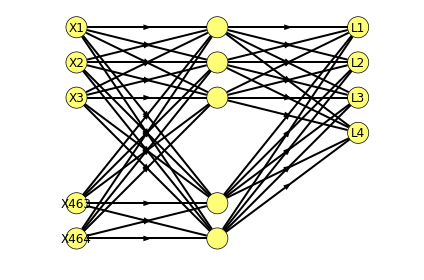

In [18]:
layer_0=[]
layer_1=[]
layer_2=[]
with DynamicShow() as d:
    brush=NodeBrush('nn.input',size='normal')
    for i in range (0,2):
        node1=brush>>(0,i)
        node2=brush>>(4,i)
        node1.text('X'+str(464-i))
        layer_0.append(node1)
        layer_1.append(node2)
    for j in range (0,4):
        node21=brush>>(8,3+j)
        node21.text('L'+str(4-j))
        layer_2.append(node21)
    node01=brush>>(0,4)
    node02=brush>>(0,5)
    node03=brush>>(0,6)
    node11=brush>>(4,4)
    node12=brush>>(4,5)
    node13=brush>>(4,6)
    node03.text('X1')
    node02.text('X2')
    node01.text('X3')
    layer_0.append(node01)
    layer_0.append(node02)
    layer_0.append(node03)
    layer_1.append(node11)
    layer_1.append(node12)
    layer_1.append(node13)
    for nodel0 in layer_0:
        for nodel1 in layer_1:
            edge = EdgeBrush('->-', lw=2)
            edge >> (nodel0, nodel1)
    for nodel2 in layer_2:
        for nodel1 in layer_1:
            edge = EdgeBrush('->-', lw=2)
            edge >> (nodel1, nodel2)

In [56]:
def cross_validation(folds,output,Ssolver,layers):
    predictions=[]
    for i in range (0,10):
        print('iteration',i+1)
        X,y=get_fitting_folds(i+1,folds,output)
        classifier=MLPClassifier(solver=Ssolver,hidden_layer_sizes=layers,activation='logistic')
        classifier.fit(X,y)
        predictions.append(classifier.predict(folds[i]))
    return(predictions)    

The function above does the cross-validation and returns the predictions done on each of the 10 validation sets. 

Notice that you can choose another Solver, as you will notice after: choosing the right solver has also effect on the accuracy, this as I think is due to the fact that the local minimas found are different according the the algorithm used by the solver. Also, you get to choose the number of layers to use so yeah play arround with it.   

In [70]:
st=time.time()
predictions=cross_validation(ten_folds,ten_outputs,'adam',(464,))
end=time.time()
print(end-st)

iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
iteration 10
8076.315854072571


In [71]:
def get_accuracy(predictions,output):
    accuracies=[]
    for i in range (0,10):
        c=0
        for j in range (0,len(output[i])):
            if predictions[i][j]==output[i][j]:
                c=c+1
        accuracies.append(100*c/len(output[i]))
    cv_accuracy=sum(accuracies)/len(accuracies)
    return(accuracies,cv_accuracy)

The function above compares the predictions on the validation sets to the real deal and returns a vector of accuracies, and also the Cross-validation test error estimate (Average of those accuracies) 

In [72]:
accuracies,accuracy=get_accuracy(predictions,ten_outputs)

In [73]:
print(accuracies)
print(accuracy)

[99.39153439153439, 99.15343915343915, 99.28571428571429, 99.28590320021158, 99.25925925925925, 99.23280423280423, 99.12721502248083, 99.23280423280423, 99.31216931216932, 99.31235122983338]
99.25931943202507


Pretty acceptable so let's try it on a unknown environement. But before let's fit a model using the whole dataset.

In [84]:
train=final_input.values.tolist()

In [ ]:
train_ex=[]
labels=[]
for line in train:
    label=line[464]
    line=line[0:464]
    train_ex.append(line)
    labels.append(label)

Let's train our final model!

In [86]:
st=time.time()
final_classifier=MLPClassifier(solver='adam',hidden_layer_sizes=(464,),activation='logistic')
final_classifier.fit(train_ex,labels)
end=time.time()
print(end-st)

758.601345539093


In [88]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\adamlast_model"
with open (file_name,'wb') as pickle_out322:
    pickle.dump(final_classifier,pickle_out322)
del(pickle_out322)

In [163]:
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\last_model"
with open (file_name,'rb') as pickle_out321:
    final_classifier=pickle.load(pickle_out321)
del(pickle_out321)

In [10]:
def clean_line(line):
    line=''.join(el for el in line if el not in set(string.punctuation)) #Removing punctuation
    line = unicodedata.normalize('NFD', line).encode('ascii', 'ignore') #First by normalize we assure that same caracter from different files would be compared the right way, #With encode we change the codage of a string with options when errors occur ignoring in this case. 
    line = line.decode('utf-8')  #f-1 of encode.
    line=line.split()
    line=[word.lower() for word in line]
    line=[word for word in line if word.isalpha()]
    #line=[word for word in line if word not in words.words()]
    line=' '.join(line)
    return(line)

Let's save the features vector, because we will need it with the final application.

In [5]:
features=final_input.columns.tolist()[0:464]
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\FFeatures"
with open (file_name,'wb') as pickle_out322:
    pickle.dump(features,pickle_out322)
del(pickle_out322)

In [ ]:
ffeatures=[]
file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\FFeatures"
with open (file_name,'rb') as pickle_in322:
    ffeatures=pickle.load(pickle_in322)
del(pickle_in322)

In [7]:
def prepare_for_prediction(text,ffeatures):
    input_i=[]
    ex_text=clean_line(text)
    ngrams_list=list(ngrams(ex_text,3))
    print(ngrams_list)
    frequency=nltk.FreqDist(ngrams_list)
    for trigram in ffeatures:
        if trigram in list(frequency.keys()):
            input_i.append(frequency[trigram]/sum(list(frequency.values())))
        else:
            input_i.append(0)
    return(input_i)

The function above takes a text and creates the vector of trigram frequencies corresponding to our features.

The function below uses the function above and then loads the model chosen by the user and uses it to predict the langauge of the text. 

In [8]:
def predict_language(File,Features,model):
    if model==1:
        print('First model')
        file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\adamlast_model"
        with open (file_name,'rb') as pickle_out321:
            CLASSIF=pickle.load(pickle_out321)
        inp=prepare_for_prediction2(File,Features)
        outp=CLASSIF.predict([inp])
    elif model==2:
        print('Second model')
        file_name="C:\\Users\\YsfDS\\Documents\\AI Project\\last_model"
        with open (file_name,'rb') as pickle_out321:
            CLASSIF=pickle.load(pickle_out321)
        inp=prepare_for_prediction2(File,Features)
        outp=CLASSIF.predict([inp])
    messagebox.showinfo("Language", "The language is: "+outp[0])
    return(outp[0])

I used Tkinter to create a GUI for this application, there is only 1 thing that I think is worth mentionning which is the command done by the Detect language button, I wanted to use a function with an argument so I opted for Lambda since normaly i button's comand function doesn't take arguments so: Inser.get('1.0','end-1c'): Gets the whole text types from 1ine 1 (1.0) to the end (end-1c). var.get() gets the value I have set for the radio button so 1 for adam solver and 2 for Quasi-Newton method. Which is coherent with the code of the function predict_language.

In [11]:
root=Tk()
root.title('Language recognition')
frame=Frame(root,width=550, height=50)
topframe=Frame(root)
topframe.pack(side=TOP)
bottomframe=Frame(root)
bottomframe.pack( side = BOTTOM)
Lab=Label(topframe,text='Please select the model you wish to use, and enter your text:')
Inser=Text(topframe,height=15,width=60)
var=IntVar()
model1=Radiobutton(bottomframe,variable=var,text='model 1: Solver: Adam',value=1)
model2=Radiobutton(bottomframe,variable=var,text='model 2: Solver: Quasi-Newton method',value=2)
Lab.pack()
Inser.pack()
model1.grid(row=0, column=0, padx=10, pady=10)
model2.grid(row=0, column=1, padx=10, pady=10)
close = Button(bottomframe, text="Close", fg="black",command=root.destroy)
close.grid(row=1, column=1, padx=10, pady=10)
detect=Button(bottomframe,text='Detect language', fg="black",command=lambda: predict_language(Inser.get('1.0','end-1c'),features,var.get()))
detect.grid(row=1, column=0, padx=10, pady=10)
frame.pack()
root.mainloop()

First model
[('d', 'e', 'm'), ('e', 'm', 'a'), ('m', 'a', 'i'), ('a', 'i', 'n')]
Second model
[('d', 'e', 'm'), ('e', 'm', 'a'), ('m', 'a', 'i'), ('a', 'i', 'n')]
First model
[('d', 'e', 'm'), ('e', 'm', 'a'), ('m', 'a', 'i'), ('a', 'i', 'n'), ('i', 'n', ' '), ('n', ' ', 'j'), (' ', 'j', 'i'), ('j', 'i', 'r'), ('i', 'r', 'a'), ('r', 'a', 'i'), ('a', 'i', ' '), ('i', ' ', 'a'), (' ', 'a', ' '), ('a', ' ', 'l'), (' ', 'l', 'e'), ('l', 'e', 'c'), ('e', 'c', 'o'), ('c', 'o', 'l'), ('o', 'l', 'e')]
Second model
[('d', 'e', 'm'), ('e', 'm', 'a'), ('m', 'a', 'i'), ('a', 'i', 'n'), ('i', 'n', ' '), ('n', ' ', 'j'), (' ', 'j', 'i'), ('j', 'i', 'r'), ('i', 'r', 'a'), ('r', 'a', 'i'), ('a', 'i', ' '), ('i', ' ', 'a'), (' ', 'a', ' '), ('a', ' ', 'l'), (' ', 'l', 'e'), ('l', 'e', 'c'), ('e', 'c', 'o'), ('c', 'o', 'l'), ('o', 'l', 'e')]
First model
[('d', 'e', 'm'), ('e', 'm', 'a'), ('m', 'a', 'i'), ('a', 'i', 'n'), ('i', 'n', ' '), ('n', ' ', 'j'), (' ', 'j', 'e'), ('j', 'e', ' '), ('e', ' ', 'v')

Hope, you found this tutorial easy to understand and helped you create your own language predictor. 

                                Youssef Esseddiq OUATITI